## Tests for Detection module

In [1]:
# import modules
from nose.tools import *
from packages.detection import Detection
%matplotlib inline

# to reload recently edited modules
%load_ext autoreload
%autoreload 2

Using gpu device 0: GeForce GT 740M (CNMeM is disabled)


In [2]:
detect = Detection()

In [3]:
x, y = detect.data_loader()

In [6]:
print x.shape, y.shape

(7705, 1, 32, 32) (7705,)


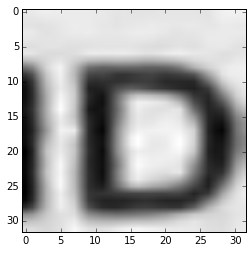

In [7]:
detect.visualize(x)

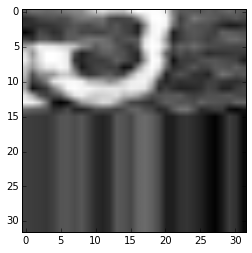

In [9]:
detect.visualize(detect.shiftup(x))

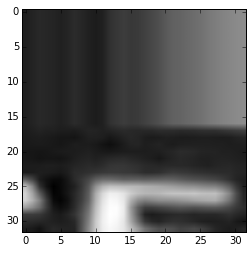

In [10]:
detect.visualize(detect.shiftdown(x))

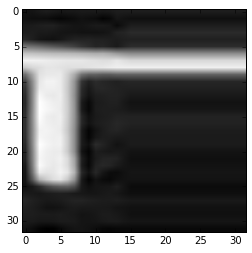

In [11]:
detect.visualize(detect.shiftleft(x))

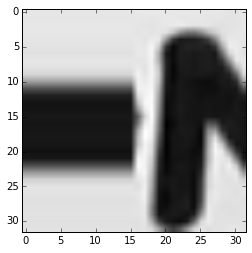

In [12]:
detect.visualize(detect.shiftright(x))

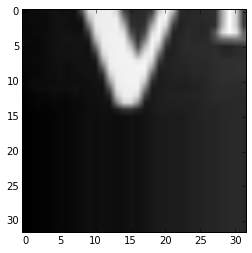

In [17]:
detect.visualize(detect.augment_creator(x)[0])

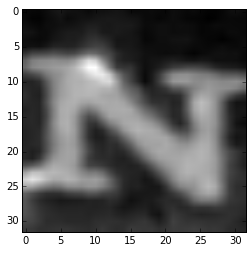

In [28]:
detect.visualize(detect.preprocess(x))